In [30]:
from __future__ import print_function

from keras.models import Model
from keras.layers import Input, LSTM, Dense
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from numpy.random import shuffle
import random
np.set_printoptions(threshold=np.inf)

batch_size = 16  # Batch size for training.
epochs = 150  # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
num_samples = 26000  # Number of samples to train on.
# Path to the data txt file on disk.
data_path = 'many_to_one_dataset.txt'
print(epochs)

150


In [2]:
import io

data_path = 'many_to_one.txt'
file = open('dataset(only_bigram).txt','w',encoding="utf-8")

#with io.open(data_path, 'w', encoding=character_encoding) as file:
#    file.write(unicode_text)
with open(data_path, 'r', encoding='utf-8') as f:
    lines = f.read().split('\n')
for line in lines[:10000]:
    file.write(line+'\n')
    
file.close()    

In [3]:
data_path = 'check_sample.txt'
file = open('dataset(only_bigram).txt','a',encoding="utf-8")

#with io.open(data_path, 'w', encoding=character_encoding) as file:
#    file.write(unicode_text)
with open(data_path, 'r', encoding='utf-8') as f:
    lines = f.read().split('\n')
    
for line in lines:
    file.write('\n'+line)
    
file.close()

In [14]:
# Vectorize the data.
data_path = 'dataset(only_bigram).txt'
input_texts = []
target_texts = []
input_characters = set()
target_characters = set()
with open(data_path, 'r', encoding='utf-8') as f:
    lines = f.read().split('\n')
    print(len(lines))
    print(lines[0])
    random.shuffle(lines)
    print(lines[0])
    
num_samples=37000    
for line in lines[: min(num_samples, len(lines) - 1)]:
    print(line)
    input_text, target_text = line.split('\t')
    # We use tab('\t') as the "start sequence" character
    # for the targets, and "\n" as "end sequence" character.
    target_text = '\t' + target_text + '\n'
    input_texts.append(input_text)
    target_texts.append(target_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)

10174
স্মৃতিকথায় ঢাকার অলিগলি-তস্যগলি—মৈশণ্ডীপাড়া,	ঢাকা
প্লেয়ারদের পক্ষাবলম্বন করে	পক্ষ
প্লেয়ারদের পক্ষাবলম্বন করে	পক্ষ
ডায়েরিতে ব্যক্তিগত শোক,	ব্যক্তি
একরের বেশি বনাঞ্চলে	বেশি
খন্দকার সাইফুল আলম	সাইফুল
অনশ্বর স্মৃতিকণাতেই তিনি	স্মৃতিকণা
শ্রীপুরের সাতখামাইর রেলওয়ে	সাতখামাইর
বিরুদ্ধে সংগ্রামে করতে।	সংগ্রাম
হন নিউস্টাড আন্তর্জাতিক	নিউস্টাড
যেতে পারতাম, ভালো	পারতাম,
মূল্যায়ন: পরিবার’, ‘স্মৃতিচারণ:	পরিবার’,
পড়ত আমার। একবার	আমা।
বাজারে গত বুধবার	গত
রাসেল ঘাট ছেড়ে	ঘাট
বসুর স্মৃতির কলম।	স্মৃতি
পেছন থেকে একটি	থেকে
ওয়েস্ট ইন্ডিজের গ্রেনাডার	ইন্ডিজ
উপজেলার সাতখামাইর রেলওয়ে	সাতখামাইর
জাহিদুল ইসলাম (১৫)।	ইসলাম
বুদ্ধি বটে চিঙ্কুর	বটে
তারই নির্মম রসালেখ্য	নির্মম
ন্যাপলিয়ঁ পর্যন্ত ফরাসি	পর্যন্ত
বলেছে, ‘মানিকের সঙ্গে	‘মানিক
রং, সহজ সরল	সহজ
তার বুকে ঈর্ষার	বুক
কেবল আমি আর	আমি
ইসলামের কলার আড়তে	কলা
ট্রাক তাদের চাপা	তাদের
কারণে এ দুর্ঘটনা	এ
ওনিলের নেদারল্যান্ড (২০০৮),	নেদারল্যান্ড
বিশ্ববিখ্যাত লেখিকা ও	লেখিকা
দুজন তরুণ ও	তরুণ
নির্মম রসালেখ্য ধরা	রসালেখ্য
একখান ঘর আছে।	ঘর
ঘাঁটিস।’ পরিষ্কার কাপড়	প

ও সাহিত্যের প্রতিটি	সাহিত্য
যুক্ত করা হয়	করা
থেকে কোনো বিচ্যুতি	কেনা
সাহিত্য বস্তুত বীরধর্মী।	বস্তুত
মশকরা করে, ‘কোঁচড়ে	কর,
মন্টু মানে দিলীপদা।	মানে
দগ্ধ হয়েছেন। তাঁকে	হয়
তাঁর স্বজনদের কাছে	স্বজন
বলেছিলেন কার্লাইল, অন্যভাবে,	কার্লাইল
নিষ্ঠুর ভাষার সৌকর্যে।	ভাষা
না নিজেকে; তার	নিজে;
আছে? ছোনা আছে?	ছোনা
পুঁটলি আরেক হাতে	আরেক
ভাস্ট দ্য প্রিজন,	দ্য
সাম্রাজ্যবাদী ইংল্যান্ডের সঙ্গে	ইংল্যান্ড
গতকাল বুধবার সন্ধ্যা	বুধবার
যন্ত্র ফিট করা	ফিট
পরে কোর্টনি ওয়ালশ,	কোর্টনি
নির্মাণকাজ চলার সময়	চলা
আর লিটলউডের মতে,	লিটলউড
জামায় আগুন ধরে	আগুন
তেলরং, জলরং, কাগজের	জলরং,
আব্দুল হামিদের স্ত্রী।	হামিদ
সূত্র: ওয়ার্ল্ড লিটারেচার	ওয়ার্ল্ড
নিহতদের পরিবারকে ২০	পরিবার
কান্নায় মেতে কী	মেতে
অব আ ফক্স-হান্টিং	আ
থানার ওসি বলেন,	ওসি
অনেক মানবিক অনুভূতির	মানবিক
ধুয়েমুছে দিতে বলেছে	দিতে
মংলা সিমেন্ট ফ্যাক্টরি	সিমেন্ট
পৌনে ১১টায় ধ্বংসস্তূপ	১১
হয়েছেন। রাত পৌনে	রাত
বেড়াচ্ছিলেন। ঢাকার সেই	ঢাকা
এলিফ্যান্ট ব্র্যান্ড নামে	ব্র্যান্ড
তদন্তে সেনা কল্যাণ	সেনা
মতো হাতখোঁপায় কোনো	হাত
যে দিনলিপি বা	দিনলিপি
মানুষের। হ

প্যাকেট নিয়ে সরে	নিয়ে
এ ভবনের ছাদ	ভবন
এ সময় মোস্তাফিজুর	সময়
বা ‘জেন্টলম্যানস গেম’।	‘জেন্টলম্যানস
ছিল মানিক। একটু	মানিক।
ময়লা যাবেক?’ কী	যাবে?’
চাপায় নিহত হন	নিহত
মেতে উঠুন বাংলা	মেতে
আর লিলি চৌধুরী	লিলি
নিয়ে সরে এল	সরে
না সইতে, আর	সইতে,
গৌরবোজ্জ্বল অতীত। যেমন	অতীত।
বসুর জীবনও।’ (প্রথম	জীবন।’
ছয় মাস। বাজারে	মাস।
বাবুর সঙ্গে ছিনিমা	সঙ্গ
ছোঁয়ায় বাবুরা অসম্মানিত	বাবু
দিয়ে আমাদের সাফল্য	আমাদের
তবে এটি তিনি	এটি
বাণীর মাধুর্যের সঙ্গে	মাধুর্য
(প্রথম আলো, ১৭	আলো
৩ ফেব্রুয়ারি সকাল	ফেব্রুয়ারি
লোককলার সম্ভারে পূর্ণ	সম্ভার
উঠতে না পারায়	না
খেলল। মা সবার	মা
হয় ঔপনিবেশিক জাতিগুলোর	ঔপনিবেশিক
বিশ্বকে জানিয়ে দেয়—এই	জানি
সৃষ্টি করে বর্ণ	কর
যে যুবকেরা চিৎকার	যুবক
মাছের পেটে ইউনুস	পেট
১৪ দশমিক ৫	দশমিক
রয়েছে। তাঁদের গ্রেপ্তারের	তাঁদের
নিহতের সংখ্যা সাতজনে	সংখ্যা
মাস দুয়েক আগে;	দুয়েক
এক প্রেমিকার গভীর	প্রেমিকা
প্রায়ই কলকাতা যাতায়াত	কলকাতা
করতেন তিনি। বুদ্ধদেব	তিনি।
পশুর নদের তীরে	নদ
হল, র্যাংকিন স্ট্রিট,	র্যাংকিন
সত্যতা নিশ্চিত করে	নিশ্চিত
প্রকল্প বাস্তবায়ন কর্মকর্তা	বাস্তবায়ন
পাওয়া যায়, সেসবের

আগে; দিলীপকুমার রায়	দিলীপকুমার
পরিবার আশ্রয়হীন হয়ে	আশ্রয়হীন
ঈর্ষার আগুন জ্বালাতেই	আগুন
অতিসারে বটের কুড়ি	বট
হয়ে আছে, তার	আছে,
চালক ছিলেন। আজ	ছিল।
জৈন্তাপুর উপজেলার আশ্রয়ণ	উপজেলা
তদন্ত করে দেখার	কর
‘প্রতিভা সোম’ নামে।	সোম’
মলিন। রোজকার মতো	রোজাকার
দ্বান্দ্বিক সম্পর্ক তৈরি	সম্পর্ক
মুহূর্তের মধ্যে আশপাশে	মধ্য
প্রণয়গত আকর্ষণ মুখ্য	আকর্ষণ
বেঙ্গল শিল্পালয় ও	শিল্পালয়
একজন জেলে বন্দী	জেল
তালুকদারের সারের গুদাম	সার
থেকে নেমে হামিদা	নেমে
হয়েছে, আবার হারিয়ে	আবার
হন। তাঁর শরীরের	তাঁর
পারে বটে, তারো	বটে
উঁচু করে পরা	কর
মরদ। তু লিশ্চয়	তু
মনসার ফণা তোলা	ফণা
মধ্যে মুখ গুঁজে	মুখ
এল ফুলবাবু হয়ে।	ফুলবাবু
আছে, দুই হাঁটু	দুই
ও বরিশাল বিভাগীয়	বরিশাল
লিজেন্ড অব প্রদীপ	অব
নিহত হয়েছেন। নাটোরের	হয়
ধসে যাওয়ার পর	যাও
করেছিল ঔপনিবেশিক শাসনের	ঔপনিবেশিক
জেনারেল হাসপাতালে নেওয়া	হাসপাতাল
হয়, যে উপন্যাস	যে
হয়। এ সময়	এ
মেরে বলছেন, ‘দ্য	বল,
নাম আমিনা বেওয়া	আমিনা
মোটরসাইকেলের অপর আরোহী	অপর
সম্পাদক : ইমরান	:
বুদ্ধদেবের সঙ্গে আলাপ	সঙ্গ
হোসেন বলেন, আহত	বল,
কোমরকে তখন যেন	তখন
গেছে, সিএনজিচালিত অটোরিকশাটি	সিএনজিচ

জেলা প্রশাসক মো.	প্রশাসক
বসানো মেথরপল্লির একমাত্র	মেথরপল্লি
ঘটনা ঘটে। নিহত	ঘটে।
হিজ মাস্টার্স ভয়েসে	মাস্টার্স
গান। সত্যেন বসুর	সত্যেন
বাড়ি শহীদনগর ও	শহীদনগর
কিন্তু ঠোঁট সাদা।	ঠোঁট
সঙ্গে। প্রথম আলোর	প্রথম
দিকে উপজেলার নওহাটা	উপজেলা
মণিপুর ফার্ম, আজিমপুর,	ফার্ম,
হয়েছে। ঘটনার পরপরই	ঘটনা
উপনিবেশে। ইংরেজি সাহিত্যে	ইংরেজি
আবুল মনসুর আহমদ	মনসুর
বলা হয় ‘ক্রিকেট	হয়
শুরু করে। কারখানাটি	কর।
দুটির কাহিনিতে প্রকাশিত	কাহিনি
নামেই তার পরিচয়	তার
ইংরেজি ঘরানার ক্রীড়ালেখকদের	ঘরানা
নিয়ে ভবন ধসের	ভবন
খসে পড়ে। মুখে	পড়ে।
ভূখণ্ডের বাসিন্দাদের তিনি	বাসিন্দা
শক্তি উপনিবেশিতদের মনে	উপনিবেশিত
বউকে সামনে বসিয়ে	সামনে
বর্ণিল জীবনের অধিকারী।	জীবন
হয় ভরা কলস।	ভরা
সেদিনও বাসার বাইরে	বাসা
ব্যবহৃত রং রাখার	রং
মূল্যায়নের চেষ্টা করেছেন;	চেষ্টা
এর পর থেকে	পর
এলাকার আল আমিন।	আল
এ ছাড়া অগ্নিদগ্ধ	ছাড়া 
পারি না। বড্ড	না।
তাদের এখনও উদ্ধার	এখন
পাওয়ার সুতীব্রবোধ। সহজেই	সুতীব্রবোধ।
এসে যাত্রাপথে বুদ্ধদেব-প্রতিভা	যাত্রাপথ
তিনজন নিহত ও	নিহত
তখন বামিয়ানে ছড়িয়ে	বামিয়ান
দেরি হয়েছে। স্থানীয়	হয়েছে।
সমালোচক নিজ নিজ	নিজ
উপন্

দোকান, সাজাবুদ্দিন খানের	সাজাবুদ্দিন
গেলে এই হতাহতের	এই
রমনা-পল্টনের জন্য দীর্ঘশ্বাস	জন্য
কোথায় কেরানিবাবু আর	কেরানিবাবু
যোগাযোগ একেবারে ক্ষীণ	একেবার
মাঠে অনুষ্ঠিত একটি	অনুষ্ঠিত
রেডিও ঝুলিয়ে অকারণে	ঝুলি
মো. ফারুকের কাপড়ের	ফারুক
শ্রমিক মিজান ও	মিজান
হয়। আগুন মুহূর্তের	আগুন
প্রত্যক্ষদর্শীরা জানান, ফায়ার	জানা,
তথ্য যেমন আমরা	যেমন
উপজেলার দোকানঘর এলাকার	দোকানঘর
চুলের বাবরি, তীক্ষ্ণ	বাবরি,
২০০১-এ এক সাক্ষাৎকারে	এক
৩০-৪০ জন শ্রমিক	জন
আশ্রয় নিয়েছেন, তবে	নিয়ে,
অন্যদিকে চালর্স ডিকেন্সের	চালর্স
হয়েছেন চারজন। গতকাল	চার।
১০টি বসতঘর সম্পূর্ণ	বসতঘর
পুরুষশাসিত নাট্যমঞ্চে নারী-পুরুষের	নাট্যমঞ্চ
এসে দাঁড়িয়ে দাঁড়িয়ে	দাঁড়ি
এ শিল্পীর ক্যানভাসজুড়ে	শিল্পী
হাসান জানান, প্রাথমিক	জানা,
ছিলেন। আজ সকালে	আজ
নয়, কিঞ্চিৎ স্মরণমাত্র।	কিঞ্চিৎ
সাংবাদিকতার মাধ্যমে কর্মজীবনের	মাধ্যম
বাংলাদেশি এই কোম্পানি	এই
আগে যদি একবার	যদি
ললিতা কেরানিবাবুর সঙ্গে	কেরানিবাবু
হাসপাতালে চিকিৎসার জন্য	চিকিৎসা
তো বটে, কিন্তু	বটে
রামপাল ও খুলনা	ও
বাড়ি ময়মনসিংহের গফরগাঁও	ময়মনসিংহ
ব্যবসা হয়েছে ৬৪০	হয়
টাকা একজন মানুষের	এক
চমরপাথা

স্বীকার করা হয়নি,	করা
ঘরে তুলবে না	তুলব
যায় এবং মোটরসাইকেলের	এবং
মিশ্রিত করে সৌধ	কর
সংঘর্ষ হয়। এতে	হয়
ধোয়া-কাচা একমাত্র হাফশার্ট	একমাত্র
এখনকার ছেলেমেয়েরাই পরস্পরকে	ছেলেমেয়ে
জানা গেছে। মরিয়ম	গেছে।
মা। আমি রেতের	আমি
কষ্ট হয় অনুবর্তী	হয়
মানিক মেথর’ বলে।	মেথর’
ঢালাইয়ের কাজ শুরু	কাজ
এখানেও প্রমাণিত যে	প্রমাণিত
হয়েছে, তা যেন	তা
ডাকনাম মন্টু। ...	মন্টু
হয়। তাকে স্থানীয়	তাকে
অবজারভার দিয়ে। তারপর	দেয়ি।
কাল মে মাস	মে
মৃত ও ৩৮	ও
সমাপ্ত ঘোষণা করেছেন।	ঘোষণা
উদ্ঘাটনে নকশা-জাতীয় ব্যঙ্গবিদ্রূপাত্মক	নকশা-জাতীয় 
কয়েলের আগুন থেকে	আগুন
ছেলে টুকুল আর	টুকুল
আন্তর্জাতিক ধারাবিবরণকারীরাই বলেন	ধারাবিবরণকারী
যেন তাদের ছোঁয়ায়	তাদের
ঘরে ছড়িয়ে পড়ে।	ছড়িয়ে
রোড বিকল্প লঞ্চঘাটে	বিকল্প
ইয়ুন-ফ্যাট অভিনীত দ্য	অভিনীত
প্রগতি। যদিও বুদ্ধদেবের	যদি
ঔপনিবেশিক ও উপনিবেশিতদের	ও
প্রান্তর, মুকুল সিনেমা	মুকুল
টিভিতে উপভোগ করেছিলাম	উপভোগ
প্রশিক্ষণটা নেয়। এখানে	নেয়।
লড়াকু খেলোয়াড় হলেও	খেলোয়াড়
দুটি বৈশিষ্ট্য প্রণিধানযোগ্য।	বৈশিষ্ট্য
না কবিতার ছুটিছাটা	কবিতা
সাহিত্যপত্র প্রগতি। যদিও	প্রগতি।
থাকলেও ব্রিটিশ সাম্রাজ্যবা

বাড়িতেই বসবাস করে	বসবাস
জন্য। নেইটিভদের আচরণে	নেটিভ
উদ্ভিন্ন ওঠানামা দেখার	ওঠানামা
টেরিজা মে বলছেন,	মে
যায়। এর পর	এর
আব্দুল কাইয়ুম বলেন,	কাইয়ুম
লর্ডস মাঠে অনুষ্ঠিত	মাঠ
ইশারায়। ঘুরে ঘুরে	ঘুর
দৃষ্টিভঙ্গিতে, ভিন্ন ভিন্ন	ভিন্ন
আক্ষরিকভাবে পূরণ হয়নি	পূরণ
উৎসব মেতে উঠেছিল	মেতে
শুরু করে তৃতীয়	কর
প্রতি পরস্পরের। যেন	পরস্পর।
সময়পরিসরে লেখা। মুনীর	লেখা
জন্মদিন ছিল ৯	ছিল
নাম অনেকে জানলেও	অনেক
লম্বা ফিরিস্তির মধ্যে	ফিরিস্তি
ভেড়ার আগে সোনারতরী	আগে
একটু লোভ সামলানো	লোভ
ফুটল কমল অবলম্বনে	কমল
ছোট ব্রিজ এলাকায়	ব্রিজ
নিয়ন্ত্রণে আনে। এর	আনে।
আবার? রূপের বটে।’	রূপ
সাক্ষাৎকারে প্রতিভা বসু	প্রতিভা
হতেই সালাম না	সালাম
সারতেন শিল্পী। আর	শিল্পী।
সেই কবে দু’হাজার	কবে
বন্ধু বটে হয়	বটে
বুঝতে আর বাকি	আর
মোমবাতি জ্বালান তিনি।	জ্বালান
বলেন যে বাংলাদেশে	যে
হলো ঔপনিবেশিক ও	ঔপনিবেশিক
নিয়েছেন, তবে হাঁটেননি	তবে
শুকনো পাতায় দ্রুত	পাতা
করে— ...বুদ্ধদেব বসু	 ...বুদ্ধদেব
আত্মকথা তার মধ্যে	তার
থাকা গরু ব্যবসায়ী	গরু
সময় হঠাৎ ছাদটি	হঠাৎ
সময়ে, যখন তিনি	যখন
বিখ্যাত রাজা তৃতীয়	রাজা
আবুল কাশেম (৩৫)	কাশেম
দোকানির টঙে চা

কিন্তু ললিতা কেরানিবাবুর	ললিতা
ছবির বিষয় হয়ে	বিষয়
ধাবমান, বড় বেশি	বড়
সাড়ে তিনটায় আগুন	তিন
গল্প-উপন্যাসের স্বাদু-বর্ণনা ও	স্বাদু-বর্ণনা
হয়ে মারা যায়।	মারা
পাতায় রোদের ছায়া।	রোদ
দাবিদার তিনি। আয়না	তিনি।
দিন রজনীগন্ধা, কখনো	রজনীগন্ধা
বাসের চাপায় আবুল	চাপা
খেলার মাধ্যমে নিজেদের	মাধ্যম
বুঝতে পারবেন এ	পারব
হলে বলা হতো	বলা
ইউনিটে চিকিৎসাধীন ছিল।	চিকিৎসাহীন
গতকাল এক স্কুলছাত্র	এক
স্তরের মধ্যে জনপ্রিয়	মধ্য
ব্যারিস্টার সুধীর রায়ের	সুধীর
সার্ভিসের কর্মীরা রাত	কর্মী
বলাকা পরিবহনের একটি	পরিবহন
সুপুষ্ট দুটো মেহগনিগাছ।	দুটো
পেতে রাখা আছে,	রাখা
নম্বর ওয়ার্ডের বরুদা	ওয়ার্ড
ছল। তাকে রাগাতেই	তাকে
অতল, তলরেখা যদি	তলরেখা
খ্যাতনামা পত্রিকায় কবিতা	পত্রিকা
বাজার থেকে পূর্বাশা	থেকে
শাসকেরাই এবং এ	এবং
সূত্র: ল্য মঁদ	ল্য
আর মুকুল মানিককে	মুকুল
এডওয়ার্ড) পোশাক খরচ	পোশাক
নবশক্তিতে গল্প এবং	গল্প
নিগুয়ারী গ্রামের কলিম	গ্রাম
নদী হয়ে যায়,	হয়
জানেন না বিখ্যাত	না
জাহিদুল ইসলামসহ (১৫)	ইসলামসহ
লেখায় আরও এসেছে	আর
...বুদ্ধদেব বসু সানন্দে	বসু
মার্চ অবধি।‌	অবধি
ছাদে ছিলেন এবং	ছিলেন
বাদি হয়ে গাজীপুর	হয়
পরিণত হয়

অগ্নিকাণ্ডে পাঁচটি দোকান	পাঁচ
রায় প্রেরিত কয়েকটি	প্রেরিত
ওঠে— রেকর্ড করতে	রেকর্ড
করতে থাকলে তিনি	থাকল
আদর করতে ইচ্ছে	কর
থাকা। তাই ক্রিকেট	তাই
কার্যাদেশ দেয়। ২০১৪	দেয়।
প্রাথমিক ভাবে ঘটনাস্থলে	ভাবে
প্রেমিকাকে না পাওয়ার	না
গ্যাসের চুলায় দিয়াশলাই	চুলা
সামনে অনেকক্ষণ ধরে	অনেকক্ষণ
‘তু কি আমার	কি
এসেছিলেন বুদ্ধদেব-প্রতিভা। ১৯৩৯-এ	বুদ্ধদেব-প্রতিভা।
অভ্যন্তরীণ সিনেমা হলগুলো,	সিনেমা
দুর্ঘটনা ঘটেছে। ফায়ার	ঘটে
শফিকুল ইসলাম (৩৫)।	ইসলাম
আবহমান বাংলা, প্রকৃতির	বাংলা
সকালে বাড়ি থেকে	বাড়ি
বুদ্ধদেব বসুর একটি	বসু
চলমান উজ্জীবিত প্রতীক।	উজ্জীবিতি
মারা যান এক	যান
ও ৩৯ জনের	৩৯
ও ফায়ার সার্ভিসের	ফায়ার
সঙ্গে বাংলা টাইপোগ্রাফির	বাংলা
তাঁর মুখবন্ধ মারফত	মুখবন্ধ
আয়োজনে পাঠকের জন্য	পাঠক
বেঙ্গল টাইগারের ডোরাকাটা	টাইগার
উইকেটে অপরাজিত ১৩৮	অপরাজিত
বুধবার রাতে অগ্নিকাণ্ডে	রাত
রানু সোমই উত্তরকালে	সোম
অবস্থায় উদ্ধার করা	উদ্ধার
কলকাতার বিখ্যাত লেখিকা	বিখ্যাত
নভেম্বর ২০০৬)। রানুদের	২০০৬)।
তদন্ত করে দেখা	কর
কোটি টাকায় চীনের	টাকা
এসে আগুন নিয়ন্ত্রণে	আগুন
সে বড়াইগ্রামের দিয়াড়পাড়া	বড়াইগ্রাম
নৌবাহিনী, কোস্ট

চাচা আজ নতুন	আজ
ডিঙ্গি ডেল—এই দুই	ডেল-এই
বিশ্বের সবচেয়ে বেশি	সবচেয়ে
ফসল। গত মঙ্গলবার	গত
মানুষ। আলফ্রেড খোকন	আলফ্রেড
উপজেলার অন্তর্গত। উল্লেখ্য,	অন্তর্গত।
কী!’ তাঁদের দাবি,	তাঁদের
উপজেলার ডাক্তারের মোড়ে	ডাক্তার
কাউকেই ঢুকতে-বেরোতে দেখল	ঢুকতে-বেরোতে
আমার।’ বাবুদের অফিসঘর	বাবু
জয়দেবপুর থানার ভারপ্রাপ্ত	থানা
দীর্ঘদিনের পুরুষশাসিত নাট্যমঞ্চে	পুরুষশাসিত
থানায় কোনো মামলা	কোনো
মহাদেবপুরগামী একটি ট্রাক	এক
পত্রিকা বুদ্ধদেবকে পৌঁছে	বুদ্ধদেব
ব্যক্তিদের মধ্যে তিনজনের	মধ্য
দানবই বটে।' তিনি	বটে
দাশ বটের ছায়ায়	বট
হয়ে। আজ যেন	আজ
কক্সবাজার ১৭ বিজিবি	১৭
সৈয়দের সঙ্গে নজরুল-বিষয়ক	সঙ্গ
কাজের ধারায় যেন	ধারা
লিখলেও থেকে থেকেই	থেকে
মারা যান। আশঙ্কাজন	যা।
ভবনের ছাদ ঢালাইয়ের	ছাদ
থানার ভারপ্রাপ্ত কর্মকর্তা	ভারপ্রাপ্ত
২৮ নম্বর ওয়ার্ডের	নম্বর
গতকাল বুধবার ক্ষতিগ্রস্ত	বুধবার
বলেন, নিহত ব্যক্তিদের	নিহত
ওয়ারী অভিযানের চাঞ্চল্যকর	অভিযান
উঠেছে পাঠকের কাছে।	পাঠক
সপ্তম লুই থেকে	লুই
(৩৫)। তিনি চাঁদপুর	তিনি
মুসলিম সমাজে নারীর	সমাজ
মূল্যায়ন’, ‘রাজনৈতিক বিশ্লেষণ’,	‘রাজনৈতিক
বলে খ্যাপাত, সত্যিই	খ্যাপা,
এক স্যানিটারি ম

In [15]:
input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

print('Number of samples:', len(input_texts))
print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)

print(input_characters)
print(target_characters)

Number of samples: 10173
Number of unique input tokens: 93
Number of unique output tokens: 93
Max sequence length for inputs: 63
Max sequence length for outputs: 24
[' ', '!', "'", '(', ')', ',', '-', '.', '/', ':', ';', '?', '|', '\xad', '²', '।', 'ঁ', 'ং', 'ঃ', 'অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'এ', 'ঐ', 'ও', 'ঔ', 'ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', '়', 'া', 'ি', 'ী', 'ু', 'ূ', 'ৃ', 'ে', 'ৈ', 'ো', 'ৌ', '্', 'ৎ', 'ৗ', 'ড়', 'য়', '০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯', '\u200c', '—', '‘', '’', '\ufeff']
['\t', '\n', ' ', '!', '(', ')', ',', '-', '.', '/', ':', ';', '?', '\xad', '।', 'ঁ', 'ং', 'ঃ', 'অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'এ', 'ঐ', 'ও', 'ঔ', 'ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', '়', 'া', 'ি', 'ী', 'ু', 'ূ', 'ৃ', 'ে', 'ৈ', 

In [16]:
import json

data = {}  
data['input_output'] = []  
data['input_output'].append({  
    'num_encoder_tokens': num_encoder_tokens,
    'num_decoder_tokens': num_decoder_tokens,
    'max_encoder_seq_length': max_encoder_seq_length,
    'max_decoder_seq_length': max_decoder_seq_length
})

with open('important_data(only_bigram).txt', 'w') as outfile:  
    json.dump(data, outfile)

In [17]:
input_token_index = dict(
    [(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict(
    [(char, i) for i, char in enumerate(target_characters)])

encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')

for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.

In [18]:
import json

print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)

data = {}  
data['input_output'] = []  
data['input_output'].append({  
    'num_encoder_tokens': num_encoder_tokens,
    'num_decoder_tokens': num_decoder_tokens,
    'max_encoder_seq_length': max_encoder_seq_length,
    'max_decoder_seq_length': max_decoder_seq_length
})

data['input_index']=input_token_index;
data['target_index']=target_token_index;

with open('important_data.txt', 'w') as outfile:  
    json.dump(data, outfile)
    
#with open('important_data.txt', 'a') as outfile:  
 #   json.dump(input_token_index, outfile)   

Number of unique input tokens: 93
Number of unique output tokens: 93
Max sequence length for inputs: 63
Max sequence length for outputs: 24


In [19]:
all_char=[]
print(input_token_index)
print(target_token_index)
print(input_token_index['ক'])
print(np.shape(encoder_input_data))

{' ': 0, '!': 1, "'": 2, '(': 3, ')': 4, ',': 5, '-': 6, '.': 7, '/': 8, ':': 9, ';': 10, '?': 11, '|': 12, '\xad': 13, '²': 14, '।': 15, 'ঁ': 16, 'ং': 17, 'ঃ': 18, 'অ': 19, 'আ': 20, 'ই': 21, 'ঈ': 22, 'উ': 23, 'ঊ': 24, 'ঋ': 25, 'এ': 26, 'ঐ': 27, 'ও': 28, 'ঔ': 29, 'ক': 30, 'খ': 31, 'গ': 32, 'ঘ': 33, 'ঙ': 34, 'চ': 35, 'ছ': 36, 'জ': 37, 'ঝ': 38, 'ঞ': 39, 'ট': 40, 'ঠ': 41, 'ড': 42, 'ঢ': 43, 'ণ': 44, 'ত': 45, 'থ': 46, 'দ': 47, 'ধ': 48, 'ন': 49, 'প': 50, 'ফ': 51, 'ব': 52, 'ভ': 53, 'ম': 54, 'য': 55, 'র': 56, 'ল': 57, 'শ': 58, 'ষ': 59, 'স': 60, 'হ': 61, '়': 62, 'া': 63, 'ি': 64, 'ী': 65, 'ু': 66, 'ূ': 67, 'ৃ': 68, 'ে': 69, 'ৈ': 70, 'ো': 71, 'ৌ': 72, '্': 73, 'ৎ': 74, 'ৗ': 75, 'ড়': 76, 'য়': 77, '০': 78, '১': 79, '২': 80, '৩': 81, '৪': 82, '৫': 83, '৬': 84, '৭': 85, '৮': 86, '৯': 87, '\u200c': 88, '—': 89, '‘': 90, '’': 91, '\ufeff': 92}
{'\t': 0, '\n': 1, ' ': 2, '!': 3, '(': 4, ')': 5, ',': 6, '-': 7, '.': 8, '/': 9, ':': 10, ';': 11, '?': 12, '\xad': 13, '।': 14, 'ঁ': 15, 'ং': 16, 'ঃ': 17, '

In [31]:
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, num_decoder_tokens))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [32]:
# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
epochs=100
print(epochs)
# Run training
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])sparse_categorical_crossentropy
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_size,
          epochs=epochs,
          shuffle=True,
          validation_split=0.2)
# Save model
model.save('s2s(only_bigram).h5')

100
Train on 8138 samples, validate on 2035 samples
Epoch 1/100
8138/8138 [==============================] - 179s 22ms/step - loss: 0.7477 - acc: 0.0554 - val_loss: 0.6891 - val_acc: 0.0605
Epoch 2/100
8138/8138 [==============================] - 161s 20ms/step - loss: 0.6587 - acc: 0.0673 - val_loss: 0.6277 - val_acc: 0.0724
Epoch 3/100
8138/8138 [==============================] - 165s 20ms/step - loss: 0.6166 - acc: 0.0771 - val_loss: 0.6022 - val_acc: 0.0769
Epoch 4/100
8138/8138 [==============================] - 162s 20ms/step - loss: 0.5892 - acc: 0.0843 - val_loss: 0.5819 - val_acc: 0.0835
Epoch 5/100
8138/8138 [==============================] - 163s 20ms/step - loss: 0.5675 - acc: 0.0895 - val_loss: 0.5655 - val_acc: 0.0892
Epoch 6/100
8138/8138 [==============================] - 163s 20ms/step - loss: 0.5449 - acc: 0.0949 - val_loss: 0.5533 - val_acc: 0.0892
Epoch 7/100
8138/8138 [==============================] - 164s 20ms/step - loss: 0.5259 - acc: 0.1003 - val_loss: 0.5388 

8138/8138 [==============================] - 165s 20ms/step - loss: 0.0116 - acc: 0.2410 - val_loss: 0.2011 - val_acc: 0.2088
Epoch 60/100
8138/8138 [==============================] - 165s 20ms/step - loss: 0.0120 - acc: 0.2411 - val_loss: 0.1957 - val_acc: 0.2094
Epoch 61/100
8138/8138 [==============================] - 165s 20ms/step - loss: 0.0110 - acc: 0.2411 - val_loss: 0.1971 - val_acc: 0.2080
Epoch 62/100
8138/8138 [==============================] - 167s 21ms/step - loss: 0.0108 - acc: 0.2413 - val_loss: 0.1985 - val_acc: 0.2088
Epoch 63/100
8138/8138 [==============================] - 165s 20ms/step - loss: 0.0105 - acc: 0.2413 - val_loss: 0.1969 - val_acc: 0.2090
Epoch 64/100
8138/8138 [==============================] - 165s 20ms/step - loss: 0.0104 - acc: 0.2413 - val_loss: 0.2006 - val_acc: 0.2087
Epoch 65/100
8138/8138 [==============================] - 165s 20ms/step - loss: 0.0100 - acc: 0.2416 - val_loss: 0.2028 - val_acc: 0.2089
Epoch 66/100
8138/8138 [================

C:\Users\RANA_CSE\Anaconda3\lib\site-packages\keras\engine\topology.py:2361: UserWarning: Layer lstm_6 was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'lstm_5/while/Exit_2:0' shape=(?, 256) dtype=float32>, <tf.Tensor 'lstm_5/while/Exit_3:0' shape=(?, 256) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  str(node.arguments) + '. They will not be included '


In [34]:
# Next: inference mode (sampling).
# Next: inference mode (sampling).
# Here's the drill:
# 1) encode input and retrieve initial decoder state
# 2) run one step of decoder with this initial state
# and a "start of sequence" token as target.
# Output will be the next target token
# 3) Repeat with the current target token and current states

# Define sampling models
data_path = 'many_to_one.txt'
print("kire")
model = load_model('s2s(only_bigram).h5')


encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

# Reverse-lookup token index to decode sequences back to
# something readable.
reverse_input_char_index = dict(
    (i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict(
    (i, char) for char, i in target_token_index.items())
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index[' ']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence




def get_input_data(test_txt):
    #txt = input()
    txt=test_txt
    
    encoder_input_data = np.zeros(
    (len(txt), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
    
    txt = txt.replace(' ', '')
    
    for t, char in enumerate(txt):
        encoder_input_data[0, t, input_token_index[char]] = 1.
        
    return encoder_input_data
    
    
    
    
# Take one sequence (part of the training set)
# for trying out decoding.
#input_seq = encoder_input_data[seq_index: seq_index + 1]

with open(data_path, 'r', encoding='utf-8') as f:
    test_lines = f.read().split('\n')

test_input_texts=[]
test_target_texts=[]
for line in test_lines[1: 100]:
    test_input_text, test_target_text = line.split('\t')
    test_input_texts.append(test_input_text)
    test_target_texts.append(test_target_text+'\n')
    
#print(test_input_texts)   

total_test_input=0
total_accuracy=0

for i in range(100):
    total_test_input=total_test_input+1
    input_seq = get_input_data(test_input_texts[i])
    decoded_sentence = decode_sequence(input_seq)
    if (decoded_sentence==test_target_texts[i]):
        total_accuracy=total_accuracy+1
        #print('hoiche')
        
    print('Input sentence:',   test_input_texts[i])
    print('Decoded sentence:', decoded_sentence)
    #print(decoded_sentence[6])
   # print('Target sentence:',  test_target_texts[i])
    #print(test_target_texts[i][6])
  
    
print('total_test_input:', total_test_input)
print('total_accuracy:', total_accuracy)
print('result:', (total_accuracy/total_test_input)*100,'%')

#yhat = model.predict(input_seq, verbose=0)
#print(yhat)

kire
Input sentence: জলছবিতে। বিনয়-বাদল-দীনেশ বাহিনীর
Decoded sentence: 

Input sentence: বিনয়-বাদল-দীনেশ বাহিনীর দাঙ্গা-সন্ত্রাসবিরোধী
Decoded sentence: 

Input sentence: বাহিনীর দাঙ্গা-সন্ত্রাসবিরোধী ওয়ারী
Decoded sentence: 

Input sentence: দাঙ্গা-সন্ত্রাসবিরোধী ওয়ারী অভিযানের
Decoded sentence: 

Input sentence: ওয়ারী অভিযানের চাঞ্চল্যকর
Decoded sentence: 

Input sentence: অভিযানের চাঞ্চল্যকর বর্ণনায়
Decoded sentence: 

Input sentence: চাঞ্চল্যকর বর্ণনায় ভাস্বর
Decoded sentence: 

Input sentence: বর্ণনায় ভাস্বর প্রতিভা
Decoded sentence: 

Input sentence: ভাস্বর প্রতিভা বসুর
Decoded sentence: (৪০)

Input sentence: প্রতিভা বসুর স্মৃতির
Decoded sentence: 

Input sentence: বসুর স্মৃতির কলম।
Decoded sentence: 

Input sentence: স্মৃতির কলম। পাড়া-মহল্লার
Decoded sentence: 

Input sentence: কলম। পাড়া-মহল্লার মানুষকে
Decoded sentence: 

Input sentence: পাড়া-মহল্লার মানুষকে সঙ্গে
Decoded sentence: 

Input sentence: মানুষকে সঙ্গে নিয়ে
Decoded sentence: 

Input sentence: সঙ্গে নিয়ে জনা
De

IndexError: list index out of range

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


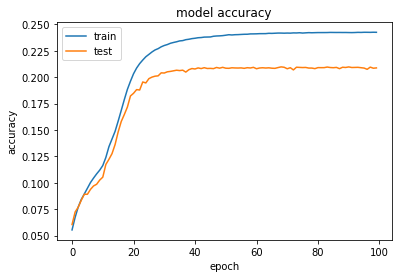

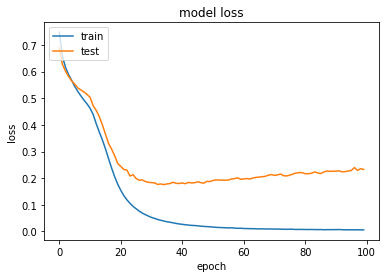

In [35]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()